In [1]:
import sys
sys.path.append("..")

In [103]:
from ethicml import LR, SVM, Majority, ZafarAccuracy, ZafarFairness, Kamiran, Agarwal
from ethicml import Accuracy, AbsCV, ProbPos, TPR, TNR, F1, BalancedAccuracy
from ethicml import BalancedTestSplit
from ethicml import evaluate_models_async, load_results
from ethicml import Adult, load_data
from ethicml import plot_results
from ethicml import Results
from ethicml.evaluators.evaluate_models import _result_path
import ethicml as em
from matplotlib import pyplot as plt

/Users/tk324/anaconda/envs/ethicml/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
from ethicml_models import GPyT, GPyTDemPar, GPyTEqOdds, TPRRatio

In [36]:
results = em.evaluate_models(
    datasets=[
        Adult(binarize_nationality=True),
        Adult("Race-Binary", binarize_nationality=True),
    ],
    inprocess_models=[
        LR(),
#             SVM(),
#             Majority(),
#             ZafarAccuracy(),
#             ZafarFairness(),
#             Kamiran(),
#             Agarwal("DP"),
#             Agarwal("EqOd"),
        GPyT(s_as_input=False, flags=dict(gpu=0)),

        GPyTDemPar(s_as_input=False, target_mode=GPyTDemPar.MIN, flags=dict(gpu=0)),
        GPyTDemPar(s_as_input=False, target_mode=GPyTDemPar.MEAN, flags=dict(gpu=0)),
        GPyTDemPar(s_as_input=False, target_mode=GPyTDemPar.MAX, flags=dict(gpu=0)),

#         GPyTDemPar(s_as_input=False, target_acceptance=0.1, flags=dict(gpu='1')),
#         GPyTDemPar(s_as_input=False, target_acceptance=0.2, flags=dict(gpu='0')),
#         GPyTDemPar(s_as_input=False, target_acceptance=0.3, flags=dict(gpu='1')),
#         GPyTDemPar(s_as_input=False, target_acceptance=0.4, flags=dict(gpu='0')),
#         GPyTDemPar(s_as_input=False, target_acceptance=0.5, flags=dict(gpu='1')),
#         GPyTDemPar(s_as_input=False, target_acceptance=0.6, flags=dict(gpu='0')),
#         GPyTDemPar(s_as_input=False, target_acceptance=0.7, flags=dict(gpu='1')),
#         GPyTDemPar(s_as_input=False, target_acceptance=0.8, flags=dict(gpu='0')),
#         GPyTDemPar(s_as_input=False, target_acceptance=0.9, flags=dict(gpu='1')),
    ],
    metrics=[Accuracy(), AbsCV(), F1(), TPRRatio(), ProbPos(), TPR(), TNR(), BalancedAccuracy()],
    per_sens_metrics=[Accuracy(), ProbPos(), TPR(), TNR()],
    repeats=0,
    delete_prev=False,
    splitter=BalancedTestSplit(),
    topic="only_baselines",
)

/Users/tk324/anaconda/envs/ethicml/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/tk324/anaconda/envs/ethicml/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The Adult class is deprecated. Use the function `adult` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/tk324/anaconda/envs/ethicml/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The Adult class is deprecated. Use the function `adult` instead.
  after removing the cwd from sys.path.
0it [00:00, ?it/s]


In [53]:
import ethicml
ethicml.utility.data_structures.RESULTS_COLUMNS = ["dataset", "transform", "model", "split_id"]

In [38]:
from pathlib import Path
outdir = Path(".") / "results"  # OS-independent way of saying './results'

/Users/tk324/anaconda/envs/ethicml/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
aggregator = em.ResultsAggregator()  # create empty aggregator object
for dataset_name in [
        "Adult Sex, binary nationality",
        "Adult Race-Binary, binary nationality",
        "Adult Race-Binary",
        "Adult Sex",
    ]:
    for topic in ["dp_balanced_test_10repeats", "dp_gp_balanced_test_10repeats"]:
        csv_file = _result_path(outdir, dataset_name, "no_transform", topic)
        aggregator.append_from_csv(csv_file)
results = aggregator.results
print(len(results))

450


/Users/tk324/anaconda/envs/ethicml/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
rate_y1_s0_sex = 0.11451785988042312
rate_y1_s1_sex = 0.31711446448288555
rate_avg_sex = 0.21581616218

rate_y1_s0_race = 0.1561938958707361
rate_y1_s1_race = 0.26669745425157304
rate_avg_race = 0.21144567506

In [113]:
models = {
    "GPyT_in_False": "GP",
    "Logistic Regression, C=1.0": "LR",
    "SVM": "SVM",
    "GPyT_dem_par_in_False": "FairGP (ours)",
    f"TuningLR, wd: 0.1, RAdam, PR_t: {rate_avg_race}": "FairLR (ours)",
    f"TuningLR, wd: 0.1, RAdam, PR_t: {rate_avg_sex}": "FairLR (ours)",
#     "ZafarAccuracy, γ=0.5",
    "ZafarFairness, c=0.001": "ZafarFairness",
    "Kamiran & Calders LR": "Kamiran and Calders (2012)",
    "Agarwal, LR, DP": "Agarwal et al. (2018)",
}

In [101]:
def filter_and_map_results(results: Results, mapping) -> Results:
    """Filter entries and change the index with a mapping."""
    return em.map_over_results_index(
        em.filter_results(results, mapping),
        lambda index: (index[0], index[1], mapping.get(index[2], index[2]), index[3]),
    )


/Users/tk324/anaconda/envs/ethicml/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [117]:
from ethicml.visualisation.common import DataEntry, LegendType, PlotDef, PlotType, errorbox, scatter

def single_plot(
    plot: plt.Axes,
    results: Results,
    xaxis,
    yaxis,
    dataset: str,
    transform,
    model_order,
    ptype = "box",
    legend_pos = "outside",
    legend_yanchor: float = 1.0,
    markersize: int = 6,
    alternating_style: bool = True,
    include_nan_entries: bool = False,
):
    """Provide the functionality of the individual plotting functions through a nice interface.

    This function can also be used to create figures with multiple plots on them, because it does
    not generate a Figure object itself.

    Args:
        plot: Plot object
        results: DataFrame with the data
        xaxis: name of column that's plotted on the x-axis
        yaxis: name of column that's plotted on the y-axis
        dataset: string that identifies the dataset
        transform: string that identifies the preprocessing method, or None
        ptype: plot type
        legend_pos: position of the legend (or None for no legend)
        legend_yanchor: position in the vertical direction where the legend should begin
        markersize: size of marker
        alternating_style: if True, entries for scatter plots are done in alternating style
        include_nan_entries: if True, entries with NaNs still appear in the legend

    Returns:
        the legend object if something was plotted; False otherwise
    """
    mask_for_dataset = results.index.get_level_values("dataset") == dataset
    if transform is not None:
        transforms: List[str] = [transform]
    else:
        transforms = [str(t) for t in results.index.to_frame()["transform"].unique()]

    entries: List[DataEntry] = []
    count = 0
    for model in model_order:
        mask_for_model = results.index.get_level_values("model") == model
        for transform_ in transforms:
            mask_for_transform = results.index.get_level_values("transform") == transform_
            data = results.loc[mask_for_dataset & mask_for_model & mask_for_transform]
            if (
                data[[xaxis[0], yaxis[0]]].empty or data[[xaxis[0], yaxis[0]]].isnull().any().any()
            ) and not include_nan_entries:
                continue  # this entry has missing values
            model_label = f"{model} ({transform_})" if transform_ != "no_transform" else str(model)
            entries.append(DataEntry(model_label, data, (not alternating_style) or count % 2 == 0))
            count += 1

    if not entries:
        return False  # nothing to plot

    title = f"{dataset}, {transform}" if transform is not None else str(dataset)
    plot_def = PlotDef(
        title=title, entries=entries, legend_pos=legend_pos, legend_yanchor=legend_yanchor
    )
    if ptype == "box":
        return errorbox(plot, plot_def, xaxis, yaxis, 0, 0, markersize, use_cross=False)
    if ptype == "cross":
        return errorbox(plot, plot_def, xaxis, yaxis, 0, 0, markersize, use_cross=True)
    if ptype == "scatter":
        return scatter(plot, plot_def, xaxis, yaxis, 0, markersize, connect_dots=False)
    if ptype == "line":
        return scatter(plot, plot_def, xaxis, yaxis, 0, markersize, connect_dots=True)
    raise ValueError(f"Unknown plot type '{ptype}'")


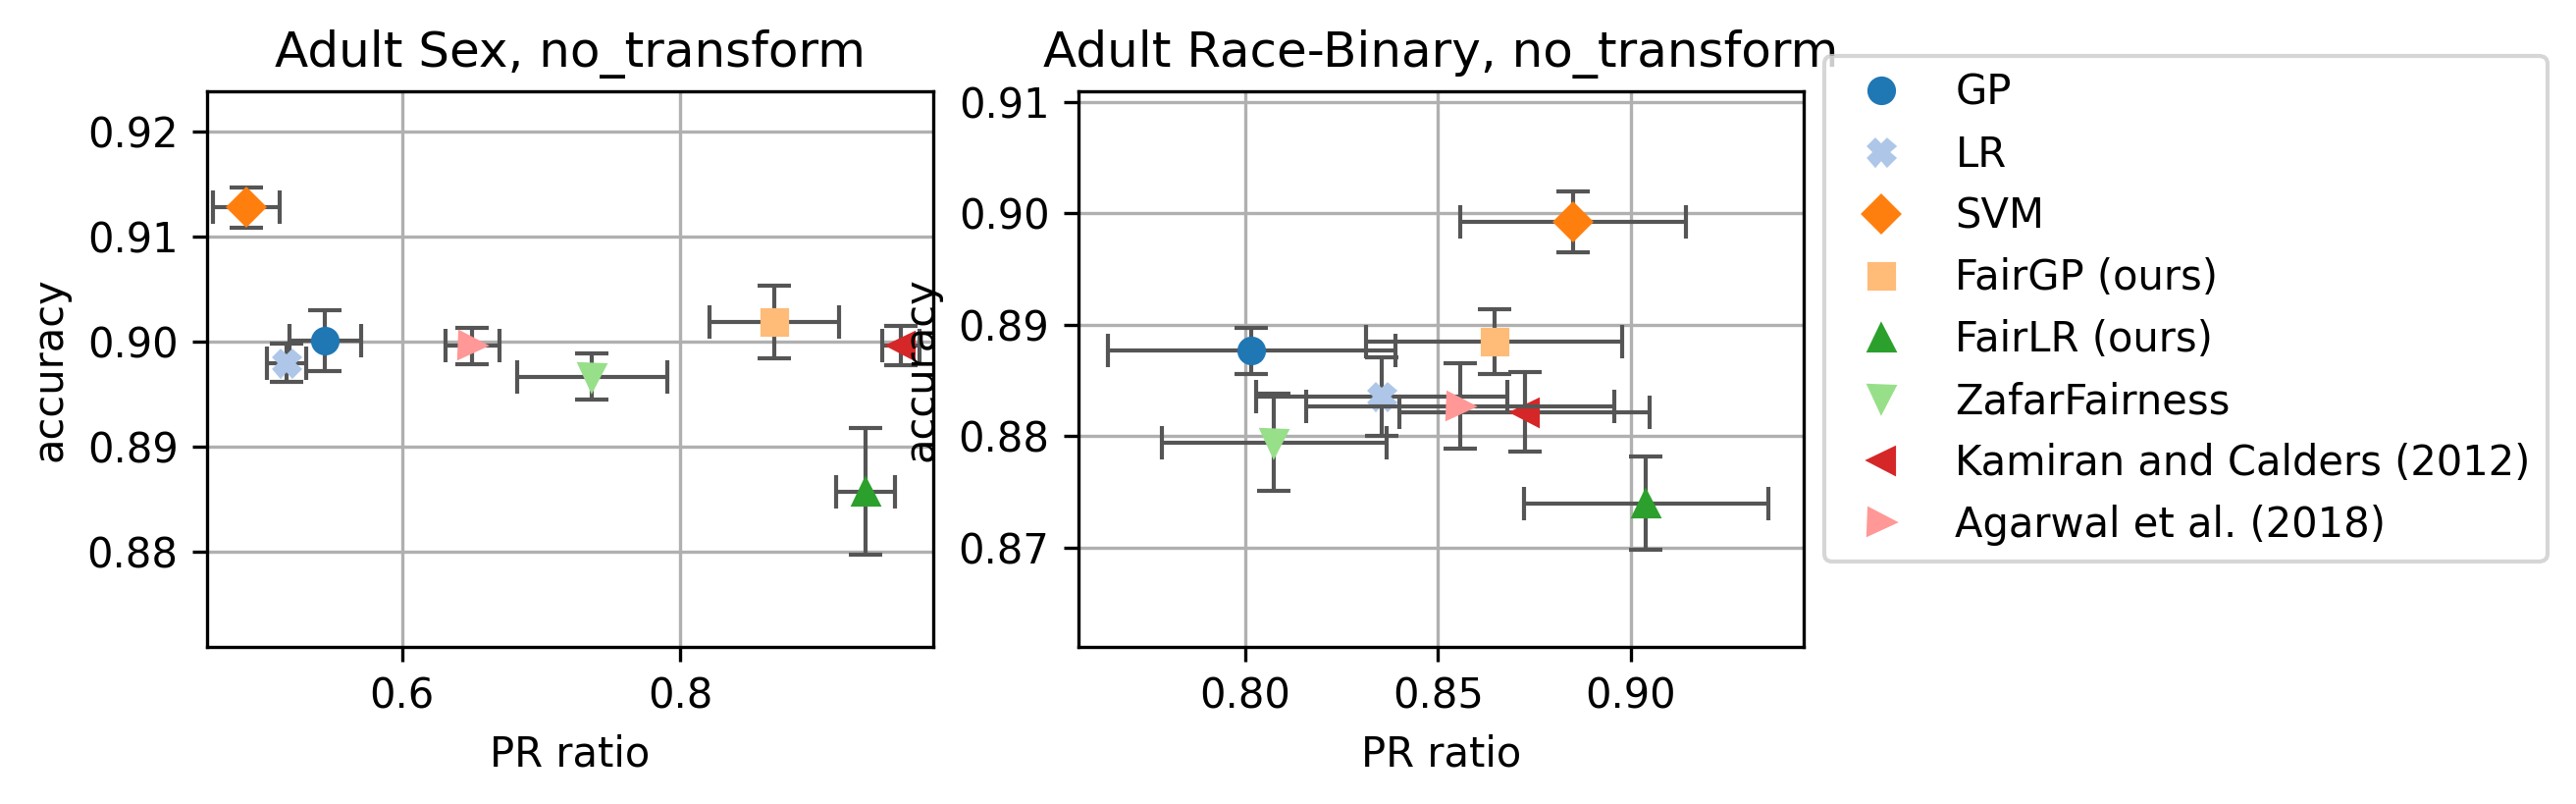

In [119]:
fig, (plot_sex, plot_race) = plt.subplots(ncols=2, figsize=(7, 2.5), dpi=300, facecolor="white")
single_plot(
    plot_sex,
    filter_and_map_results(results, models),
    ("prob_pos_sex_Male_0/sex_Male_1", "PR ratio"),
    ("Accuracy", "accuracy"),
    "Adult Sex",
    transform="no_transform",
    ptype="cross",
    legend_pos=None,
    model_order=list(models.values())[:4] + list(models.values())[5:],
)
plot_sex.set_title("(b) sensitive: gender")
legends = single_plot(
    plot_race,
    filter_and_map_results(results, models),
    ("prob_pos_race_White_0/race_White_1", "PR ratio"),
    ("Accuracy", "accuracy"),
    "Adult Race-Binary",
    transform="no_transform",
    ptype="cross",
    legend_pos="outside",
    legend_yanchor=1.1,
    model_order=list(models.values())[:4] + list(models.values())[5:],
)
plot_sex.set_title("(b) sensitive: gender")
fig.tight_layout()
fig.savefig("dp_plot.png")

/Users/tk324/anaconda/envs/ethicml/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


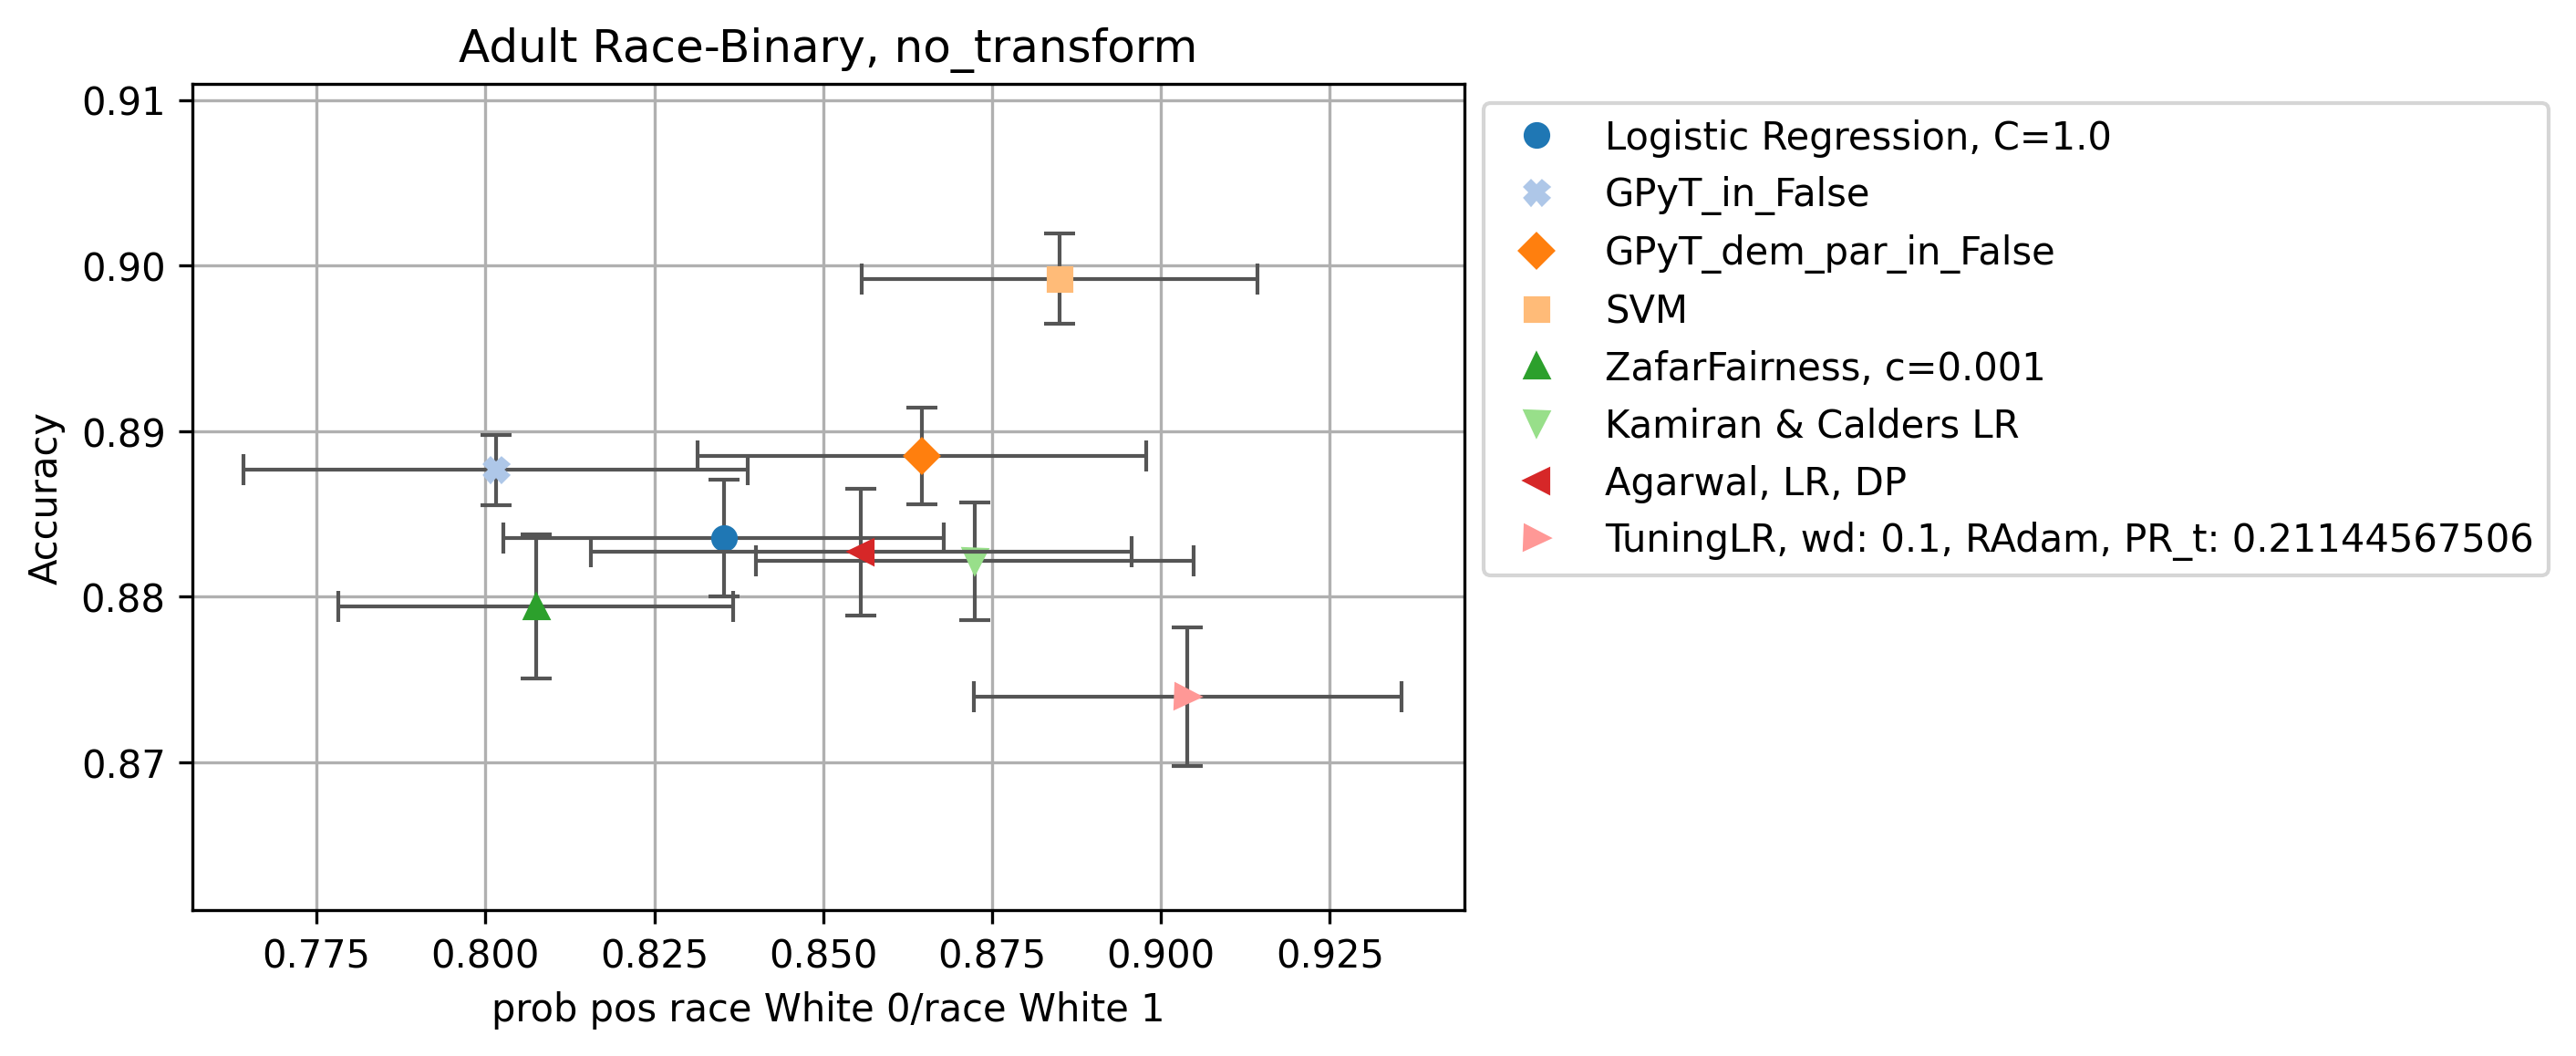

In [96]:
(fig, plot), = plot_results(filter_and_map_results(results, models), "Accuracy", "prob_pos_race_White_0/race_White_1", ptype="cross")
fig

In [6]:
(fig, plot), = plot_results(results, "Balanced Accuracy", "prob_pos_sex_Male_0/sex_Male_1", ptype="cross")
fig

AttributeError: 'NoneType' object has no attribute 'columns'

In [ ]:
(fig, plot), = plot_results(results, "Balanced Accuracy", "prob_pos_race_White_0/race_White_1", ptype="cross")
fig

In [ ]:
(fig, plot), = plot_results(results, "F1", "prob_pos_sex_Male_0/sex_Male_1", ptype="cross")
fig

In [ ]:
(fig, plot), = plot_results(results, "Accuracy", "TPR_sex_Male_0/sex_Male_1", ptype="cross")
fig

In [ ]:
(fig, plot), = plot_results(
    Results(results.data.query("model != 'Majority'")),
    "prob_pos_sex_Male_0", "prob_pos_sex_Male_1", ptype="cross")

plot.set_ylim((0.05, 0.35))
fig

In [ ]:
(fig, plot), = plot_results(
    Results(results.data.query("model != 'Majority'")),
    "TPR", "TNR", ptype="cross")

# plot.set_ylim((0.05, 0.35))
fig

In [ ]:
(fig, plot), = plot_results(
    Results(results.data.query("model != 'Majority'")),
    "TNR_sex_Male_0", "TNR_sex_Male_1", ptype="cross")

# plot.set_ylim((0.05, 0.35))
fig

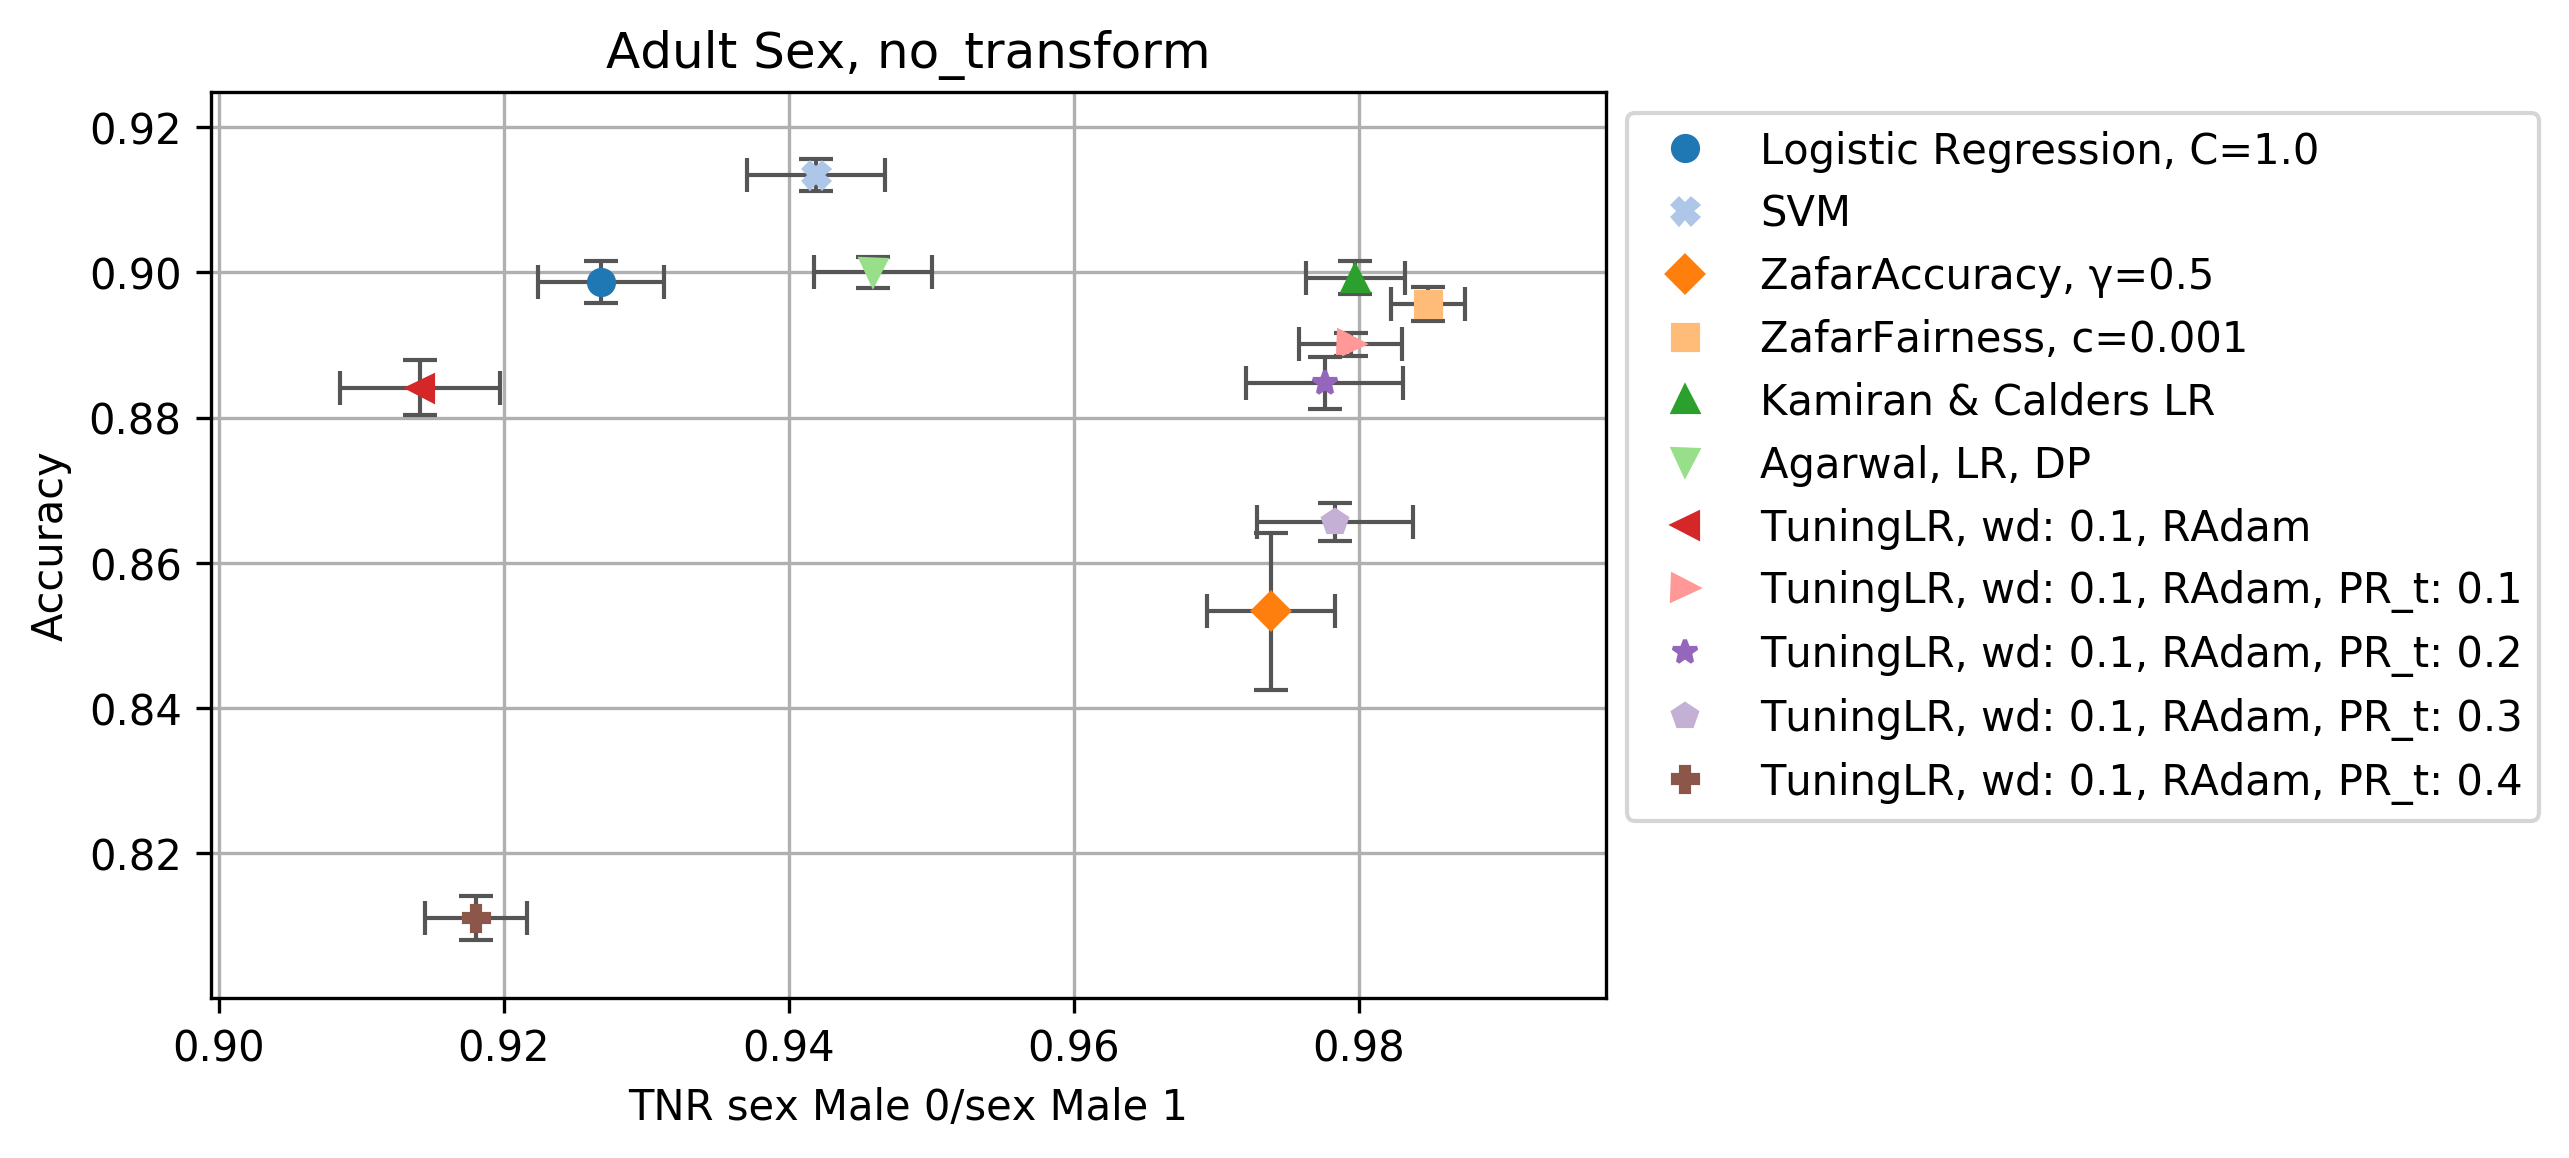

In [11]:
results_temp = Results(results.data.query("model != 'TuningLR, wd: 0.1, RAdam, PR_t: 0.5' & model != 'Majority'"))
(fig, plot), = plot_results(results_temp, "Accuracy", "TNR_sex_Male_0/sex_Male_1", ptype="cross")
fig

In [21]:
results_temp.data

Accuracy  \
dataset   transform    model                               split_id             
Adult Sex no_transform Logistic Regression, C=1.0          4         0.898775   
                       SVM                                 4         0.909323   
                       ZafarAccuracy, γ=0.5                4         0.862368   
                       ZafarFairness, c=0.001              4         0.900476   
                       Kamiran & Calders LR                4         0.899626   
...                                                                       ...   
                       TuningLR, wd: 0.1, RAdam            4         0.878530   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.1 4         0.887547   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.2 4         0.877339   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.3 4         0.859986   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.4 4         0.804866   

                                                                     Accuracy_sex_Male_0  \
dataset   transform    model                               split_id                        
Adult Sex no_transform Logistic Regression, C=1.0          4                    0.921742   
                       SVM                                 4                    0.927526   
                       ZafarAccuracy, γ=0.5                4                    0.862198   
                       ZafarFairness, c=0.001              4                    0.902007   
                       Kamiran & Calders LR                4                    0.910854   
...                                                                                  ...   
                       TuningLR, wd: 0.1, RAdam            4                    0.920041   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.1 4                    0.900987   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.2 4                    0.896563   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.3 4                    0.876489   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.4 4                    0.838721   

                                                                     Accuracy_sex_Male_0-sex_Male_1  \
dataset   transform    model                               split_id                                   
Adult Sex no_transform Logistic Regression, C=1.0          4                               0.045934   
                       SVM                                 4                               0.036407   
                       ZafarAccuracy, γ=0.5                4                               0.000340   
                       ZafarFairness, c=0.001              4                               0.003062   
                       Kamiran & Calders LR                4                               0.022457   
...                                                                                             ...   
                       TuningLR, wd: 0.1, RAdam            4                               0.083021   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.1 4                               0.026880   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.2 4                               0.038448   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.3 4                               0.033004   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.4 4                               0.067710   

                                                                     Accuracy_sex_Male_0/sex_Male_1  \
dataset   transform    model                               split_id                                   
Adult Sex no_transform Logistic Regression, C=1.0          4                               0.950166   
                       SVM                                 4                               0.960748   
                       ZafarAccuracy, γ=0.5                4      

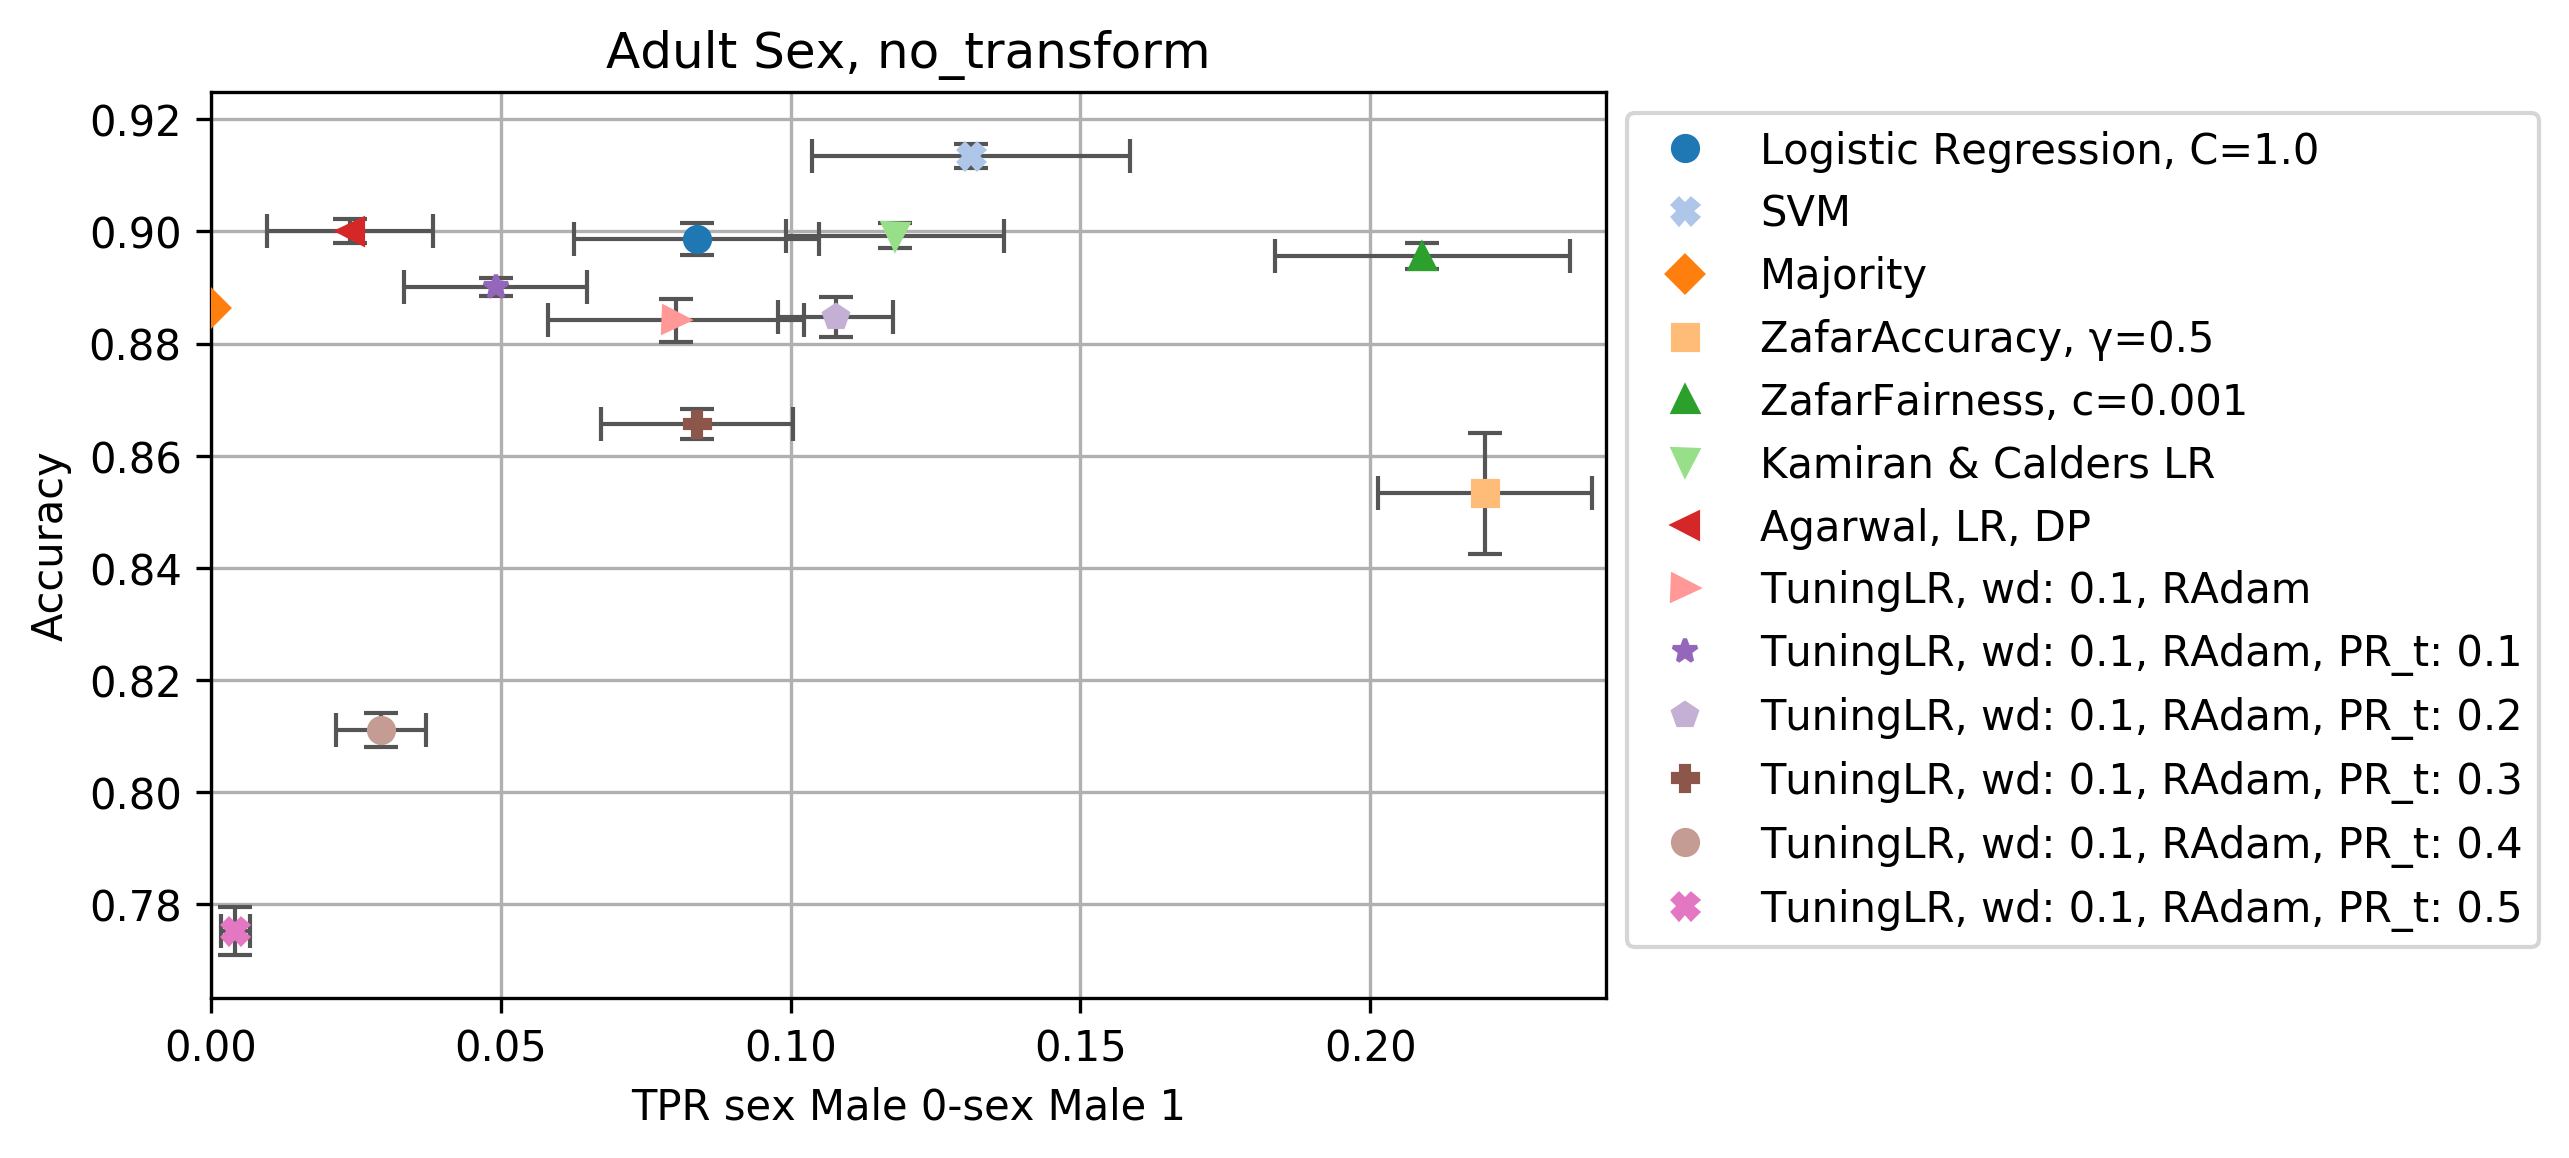

In [12]:
(fig, plot), = plot_results(results, "Accuracy", "TPR_sex_Male_0-sex_Male_1", ptype="cross")
fig

In [5]:
import pandas as pd

In [7]:
df_sex = pd.read_csv("results/dp_gp_balanced_test_10repeats_Adult Sex, binary nationality_no_transform.csv")
df_race = pd.read_csv("results/dp_gp_balanced_test_10repeats_Adult Race-Binary, binary nationality_no_transform.csv")

In [14]:
df_race.groupby("model").agg(["mean", "std"])[["prob_pos_race_White_0/race_White_1", "Accuracy"]]

prob_pos_race_White_0/race_White_1            \
                                                            mean       std   
model                                                                        
GPyT_dem_par_in_False                                   0.864597  0.066448   
GPyT_dem_par_in_False_tar_max                           0.832027  0.056777   
GPyT_dem_par_in_False_tar_min                           0.876612  0.063806   
GPyT_in_False                                           0.801548  0.074591   
Logistic Regression, C=1.0                              0.837678  0.072776   

                               Accuracy            
                                   mean       std  
model                                              
GPyT_dem_par_in_False          0.888489  0.005812  
GPyT_dem_par_in_False_tar_max  0.886155  0.005762  
GPyT_dem_par_in_False_tar_min  0.891060  0.005118  
GPyT_in_False                  0.887658  0.004207  
Logistic Regression, C=1.0     0.883109  0.007478

In [15]:
df_sex.groupby("model").agg(["mean", "std"])[["prob_pos_sex_Male_0/sex_Male_1", "Accuracy"]]

prob_pos_sex_Male_0/sex_Male_1            \
                                                        mean       std   
model                                                                    
GPyT_dem_par_in_False                               0.867136  0.093224   
GPyT_dem_par_in_False_tar_max                       0.937670  0.037323   
GPyT_dem_par_in_False_tar_min                       0.798070  0.136580   
GPyT_in_False                                       0.544699  0.051607   
Logistic Regression, C=1.0                          0.515716  0.025884   

                               Accuracy            
                                   mean       std  
model                                              
GPyT_dem_par_in_False          0.901837  0.006946  
GPyT_dem_par_in_False_tar_max  0.884008  0.007835  
GPyT_dem_par_in_False_tar_min  0.912793  0.009274  
GPyT_in_False                  0.900068  0.005847  
Logistic Regression, C=1.0     0.898146  0.003894